<a href="https://colab.research.google.com/github/onkark110/chatbot/blob/main/capstone2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import string
import random, re
from wordcloud import WordCloud,STOPWORDS
import nltk 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import contractions

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# locading input data from csv 
print("Loading the input csv data")
data = pd.read_csv('/content/drive/My Drive/industrial_safety_and_health_database_with_accidents_description.csv')
data.head(5)

Loading the input csv data


,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
print("*"*30)
print("Droping unwanted coulmns")
data = data.drop(data.columns[[0,1,2,3]],axis=1)


******************************
Droping unwanted coulmns


In [ ]:
data.head(5)

,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
# Removing punctuations
data['Description'] = data['Description'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))
print(f'punctuations {string.punctuation} removed from Description coulmn')

punctuations !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ removed from Description coulmn


In [ ]:
# contractions expension
#!pip install contractions
data['Description'] = data['Description'].apply(lambda x: contractions.fix(x))
print("contractions expension on the Description column completed")

contractions expension on the Description column completed


In [ ]:
# Convert text to lowercase
data['Description'] = data['Description'].apply(lambda x: x.lower())
print("Converted Description to lowercase")

Converted Description to lowercase


In [ ]:
#Remove single letter word
data['Description'] = data['Description'].apply(lambda x:re.sub(r'\b\w{1}\b',"",x ,flags=re.I))
print("Removed the single letter from the Description column data")

Removed the single letter from the Description column data


In [ ]:
#Remove NA
data['Description'] = data['Description'].apply(lambda x:re.sub(r'\bNA\b',"",x ,flags=re.I))
print("Removed the NA from the Description column data")

Removed the NA from the Description column data


In [ ]:
#Removing the email addresses
data['Description'] = data['Description'].apply(lambda x: re.sub(r"\S+@\S+", "",x ,flags=re.I))
print("Removed email id from the Description column data")

Removed email id from the Description column data


In [ ]:
#Remove all date formats 
#pattern_str="^(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?(?:(?:(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:(?:-|/)|(?:,|\.)?\s)?)?(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?)(?:\d{2,4})$"
data['Description'] = data['Description'].apply(lambda x: re.sub(r"^(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?(?:(?:(?:Jan(?:uary)?|Feb(?:ruary)?|Mar(?:ch)?|Apr(?:il)?|May|Jun(?:e)?|Jul(?:y)?|Aug(?:ust)?|Sep(?:tember)?|Oct(?:ober)?|Nov(?:ember)?|Dec(?:ember)?)(?:(?:-|/)|(?:,|\.)?\s)?)?(?:\d{1,2}(?:(?:-|/)|(?:th|st|nd|rd)?\s))?)(?:\d{2,4})$", "",x ,flags=re.I))
print("Removed date from the Description column data")

Removed date from the Description column data


In [ ]:
#Remove digits
data['Description'] = data['Description'].apply(lambda x: re.sub(r"\d", "",x ,flags=re.I))
print("Removed digits from the Description column data")

Removed digits from the Description column data


In [ ]:
# Strip unwanted spaces
data['Description'] = data['Description'].apply(lambda x: re.sub(' +', ' ', x))
print("Striped unwanted spaces from the Description column data")


Striped unwanted spaces from the Description column data


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
data['Description'] = data['Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
print("Removed the stopwords in the Description column")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Removed the stopwords in the Description column


In [ ]:
data['Description'].head(10)

0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    substation milpo located level collaborator ex...
3    approximately nv cx ob personnel begins task u...
4    approximately circumstances mechanics anthony ...
5    unloading operation ustulado bag need unclog d...
6    collaborator reports street holding left hand ...
7    approximately pm mechanic technician josé tecn...
8    employee sitting resting area level raise bore...
9    moment forklift operator went manipulate big b...
Name: Description, dtype: object

In [ ]:
print("Lemetizeing the words")
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
wordNet = WordNetLemmatizer()
#data['Description'] = data['Description'].apply(lambda x: ' '.join([ wordNet.lemmatize(word)  for word in x.split()]))

def lem(text):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV }
    return(' '.join([wordNet.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(text.split())]))

print('Applying Lemmatizer')
data['Description'] = data['Description'].apply(lambda x: lem(x))

Lemetizeing the words
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Applying Lemmatizer


In [ ]:
data['Description'].head(10)

0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    substation milpo located level collaborator ex...
3    approximately nv cx ob personnel begin task un...
4    approximately circumstance mechanic anthony gr...
5    unloading operation ustulado bag need unclog d...
6    collaborator report street holding left hand v...
7    approximately pm mechanic technician josé tecn...
8    employee sitting resting area level raise bore...
9    moment forklift operator went manipulate big b...
Name: Description, dtype: object

In [ ]:
text=" ".join(description for description in data.Description )
#text

In [ ]:
len(text.split())

14018

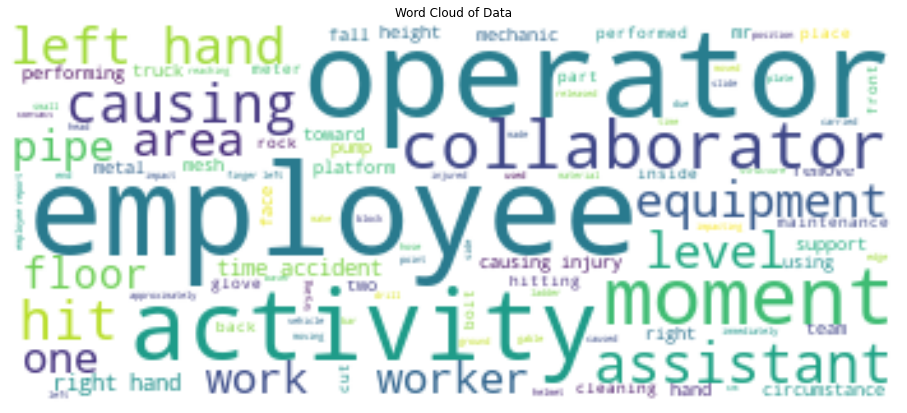

In [ ]:
# lower max_font_size, change the maximum number of word and lighten the background:
def plot_wordcloud(text,title):
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",width = 350, height = 150,collocations = True).generate(text)
  plt.figure(figsize=(16,8))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(title)
  plt.axis("off")
  plt.show()

plot_wordcloud(text,"Word Cloud of Data")

In [ ]:
data.head(1)

,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,Mining,I,IV,Male,Third Party,Pressed,removing drill rod jumbo maintenance superviso...


In [ ]:
data['Critical Risk'].unique()

array(['Pressed', 'Pressurized Systems', 'Manual Tools', 'Others',
       'Fall prevention (same level)', 'Chemical substances',
       'Liquid Metal', 'Electrical installation', 'Confined space',
       'Pressurized Systems / Chemical Substances',
       'Blocking and isolation of energies', 'Suspended Loads', 'Poll',
       'Cut', 'Fall', 'Bees', 'Fall prevention', '\nNot applicable',
       'Traffic', 'Projection', 'Venomous Animals', 'Plates',
       'Projection/Burning', 'remains of choco',
       'Vehicles and Mobile Equipment', 'Projection/Choco',
       'Machine Protection', 'Power lock', 'Burn',
       'Projection/Manual Tools', 'Individual protection equipment',
       'Electrical Shock', 'Projection of fragments'], dtype=object)

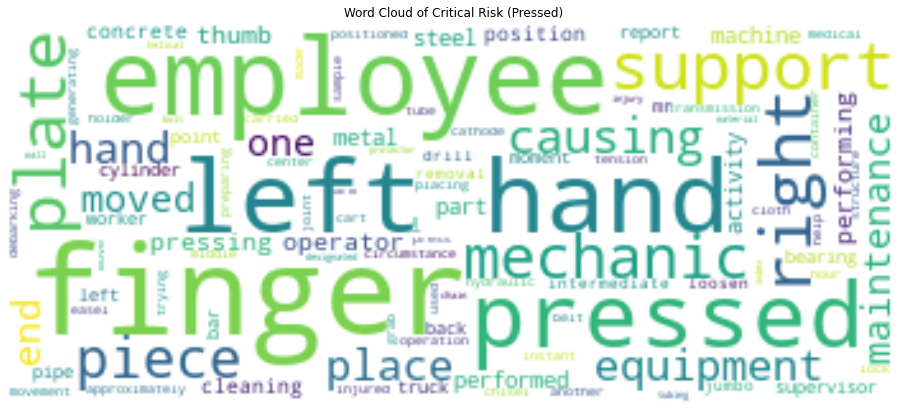

In [ ]:
filter_data = ' '.join((data.loc[data['Critical Risk'] == 'Pressed']).Description)
plot_wordcloud(filter_data,"Word Cloud of Critical Risk (Pressed)")

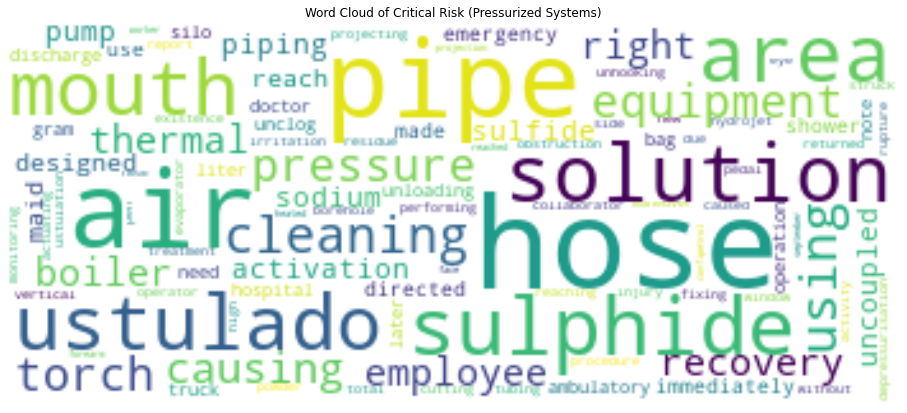

In [ ]:
filter_data = ' '.join((data.loc[data['Critical Risk'] == 'Pressurized Systems']).Description)
plot_wordcloud(filter_data,"Word Cloud of Critical Risk (Pressurized Systems)")

In [ ]:
data_split = pd.Series(' '.join(data.Description).split()).value_counts( ascending=False)[:50]
data_split

employee         183
hand             181
causing          166
left             160
right            155
operator         133
activity         120
time             112
injury           111
moment           103
worker            87
collaborator      84
area              81
one               80
work              80
equipment         77
finger            76
assistant         75
accident          73
pipe              72
level             71
hit               71
floor             65
support           62
mesh              59
rock              57
fall              56
cm                55
mr                54
safety            53
glove             53
meter             52
team              50
approximately     48
height            47
part              46
side              46
described         45
circumstance      44
truck             43
kg                43
pump              43
metal             42
face              42
used              42
cut               42
injured           41
place        

In [ ]:
data_split = pd.Series(' '.join(data.Description).split()).value_counts( ascending=True)[:50]
data_split

shuttering        1
burr              1
pickup            1
intense           1
splashed          1
roger             1
laden             1
lucas             1
digger            1
hycrontype        1
seam              1
insertion         1
ce                1
piquero           1
shipping          1
hydroxide         1
stitch            1
hatch             1
bathroom          1
rhainer           1
comedor           1
enoc              1
walter            1
shotcreteados     1
eriks             1
ignited           1
cajamarquilla     1
jack              1
fabric            1
reference         1
endured           1
remains           1
data              1
tightens          1
december          1
tightening        1
chemo             1
​​electrolysis    1
saddle            1
supervise         1
wk                1
emptiness         1
abutment          1
backhoe           1
examination       1
absorbing         1
compartment       1
stretched         1
polyurethane      1
lack              1


In [ ]:
#Tokenization
vocab_size = 10000
embedding_dim = 16
max_length = 12
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(data['Description'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(data['Description'])
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(data['Description'])
test_padded = pad_sequences(test_sequences,maxlen=max_length)

In [ ]:
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range =(2, 2)) 
X1 = vectorizer.fit_transform(data)  
features = (vectorizer.get_feature_names()) 
print("\n\nX1 : \n", X1.toarray()) 
  



X1 : 
 [[0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [ ]:
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (2, 2)) 
X2 = vectorizer.fit_transform(data) 
scores = (X2.toarray()) 
print("\n\nScores : \n", scores) 



Scores : 
 [[0.         0.         0.         1.         0.         0.
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.63870855 0.         0.         0.         0.         0.76944876
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.57735027 0.         0.57735027 0.
  0.57735027]
 [0.         1.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.
  0.        ]]


In [ ]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0, col] )) 
ranking = pd.DataFrame(data1, columns = ['term', 'rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
words.head()

,term,rank
0,accident level,1.638709
1,critical risk,1.000000
3,industry sector,1.000000
5,potential accident,0.769449
2,employee or,0.577350
